# FlowerGarden task generation

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import string
from random import shuffle,seed,choices
from faker import Faker
from faker.providers.person.en import Provider
import networkx as nx
import itertools

from utils import Utils
from flower_garden import FlowerGarden
from dataset_generator import DataSetGenerator

In [2]:
u = Utils()
dg = DataSetGenerator()

## Error test (low complexity)

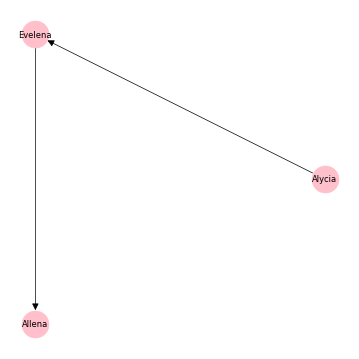


Causal context: A group of friends is planting a bed of flowers from seed, but the seed packets are not labeled. Alycia will be happy if the flowers she planted are purple. Evelena will be happy if the flowers she planted are yellow or if Alycia is happy. Allena will be happy if the flowers she planted are purple or if Evelena is happy. 

Sample context:  Once the flowers bloom, Alycia's flowers are lilac purple, Evelena's flowers are deep purple, and Allena's flowers are lemon yellow.

- Global cause-effect pairs: ('Alycia', 'Allena')
- Local cause-effect pairs: [('Alycia', 'Evelena'), ('Evelena', 'Allena')]
- Compositions: [[('Alycia', 'Evelena'), ('Evelena', 'Allena')]]


In [3]:
size = [2,2]
tg = FlowerGarden(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())

In [4]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Allena': {'Prompt': 'Is Allena happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Alycia': 1, 'Evelena': 1, 'Allena': 1},
  'True exogenous': {'HLIU': 1, 'DGA6': 0, 'LWS0': 0},
  'True response': 1},
 'Evelena': {'Prompt': 'Is Evelena happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Alycia': 1, 'Evelena': 1, 'Allena': 1},
  'True exogenous': {'HLIU': 1, 'DGA6': 0, 'LWS0': 0},
  'True response': 1}}

In [5]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Alycia', 'Allena') --
Prompt: Now, suppose that Alycia is happy regardless of all other circumstances. With this new assumption, is Allena happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Alycia': 1, 'Evelena': 1, 'Allena': 1}
True exogenous: {'HLIU': 1, 'DGA6': 0, 'LWS0': 0}
True response: 1

-----------------------

-- ('Alycia', 'Evelena') --
Prompt: Now, suppose that Alycia is happy regardless of all other circumstances. With this new assumption, is Evelena happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Alycia': 1, 'Evelena': 1, 'Allena': 1}
True exogenous: {'HLIU': 1, 'DGA6': 0, 'LWS0': 0}
True response: 1

-----------------------

-- ('Evelena', 'Allena') --
Prompt: Now, suppose that Evelena is happy regardless of all other circumstances. With this new assumption, is Allena happy? Begin your response with Yes or No and be 

In [6]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Alycia', 'Allena') --
Prompt: Now, suppose that Alycia is happy regardless of all other circumstances. With this new assumption, is Allena happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Alycia': 0, 'Evelena': 0, 'Allena': 0}
True exogenous: {'HLIU': 1, 'DGA6': 0, 'LWS0': 0}
True response: 0

-----------------------

-- ('Alycia', 'Evelena') --
Prompt: Now, suppose that Alycia is happy regardless of all other circumstances. With this new assumption, is Evelena happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Alycia': 0, 'Evelena': 0, 'Allena': 0}
True exogenous: {'HLIU': 1, 'DGA6': 0, 'LWS0': 0}
True response: 0

-----------------------

-- ('Evelena', 'Allena') --
Prompt: Now, suppose that Evelena is happy regardless of all other circumstances. With this new assumption, is Allena happy? Begin your response with Yes or No and be

In [7]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,Alycia,Evelena,Allena
0,1,1,1
1,1,1,1
2,0,1,1
3,0,0,1
4,0,0,1


,HLIU,DGA6,LWS0
0,1,0,0
1,1,1,1
2,0,1,1
3,0,0,1
4,0,0,1


In [8]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Alycia = 1 --


,Alycia,Evelena,Allena
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


,HLIU,DGA6,LWS0
0,1,0,0
1,1,1,1
2,0,1,1
3,0,0,1
4,0,0,1



-- Evelena = 1 --


,Alycia,Evelena,Allena
0,1,1,1
1,1,1,1
2,0,1,1
3,0,1,1
4,0,1,1


,HLIU,DGA6,LWS0
0,1,0,0
1,1,1,1
2,0,1,1
3,0,0,1
4,0,0,1


In [9]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Alycia = 0 --


,Alycia,Evelena,Allena
0,0,0,0
1,0,1,1
2,0,1,1
3,0,0,1
4,0,0,1


,HLIU,DGA6,LWS0
0,1,0,0
1,1,1,1
2,0,1,1
3,0,0,1
4,0,0,1



-- Evelena = 0 --


,Alycia,Evelena,Allena
0,1,0,0
1,1,0,1
2,0,0,1
3,0,0,1
4,0,0,1


,HLIU,DGA6,LWS0
0,1,0,0
1,1,1,1
2,0,1,1
3,0,0,1
4,0,0,1


## Error test (moderate complexity)

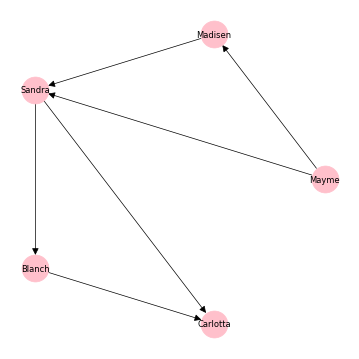


Causal context: A group of friends is planting a bed of flowers from seed, but the seed packets are not labeled. Mayme will be happy if the flowers she planted are pink. Madisen will be happy if the flowers she planted are red or if Mayme is happy. Sandra will be happy if the flowers she planted are pink or if Mayme is happy or if Madisen is happy. Blanch will be happy if the flowers she planted are red or if Sandra is happy. Carlotta will be happy if the flowers she planted are yellow or if Sandra is happy or if Blanch is happy. 

Sample context:  Once the flowers bloom, Mayme's flowers are pastel yellow, Madisen's flowers are canary yellow, Sandra's flowers are lemon yellow, Blanch's flowers are brick red, and Carlotta's flowers are baby pink.

- Global cause-effect pairs: ('Mayme', 'Carlotta')
- Local cause-effect pairs: [('Mayme', 'Sandra'), ('Sandra', 'Carlotta')]
- Compositions: [[('Mayme', 'Sandra'), ('Sandra', 'Carlotta')]]


In [10]:
size = [3,3]
tg = FlowerGarden(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())

In [11]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Carlotta': {'Prompt': 'Is Carlotta happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Mayme': 0,
   'Madisen': 0,
   'Sandra': 0,
   'Blanch': 1,
   'Carlotta': 1},
  'True exogenous': {'5UGW': 0, '3VU1': 0, 'E9EJ': 0, 'ZCG2': 1, '75J2': 0},
  'True response': 1},
 'Sandra': {'Prompt': 'Is Sandra happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Mayme': 0,
   'Madisen': 0,
   'Sandra': 0,
   'Blanch': 1,
   'Carlotta': 1},
  'True exogenous': {'5UGW': 0, '3VU1': 0, 'E9EJ': 0, 'ZCG2': 1, '75J2': 0},
  'True response': 0}}

In [12]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Mayme', 'Carlotta') --
Prompt: Now, suppose that Mayme is happy regardless of all other circumstances. With this new assumption, is Carlotta happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Mayme': 1, 'Madisen': 1, 'Sandra': 1, 'Blanch': 1, 'Carlotta': 1}
True exogenous: {'5UGW': 0, '3VU1': 0, 'E9EJ': 0, 'ZCG2': 1, '75J2': 0}
True response: 1

-----------------------

-- ('Mayme', 'Sandra') --
Prompt: Now, suppose that Mayme is happy regardless of all other circumstances. With this new assumption, is Sandra happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Mayme': 1, 'Madisen': 1, 'Sandra': 1, 'Blanch': 1, 'Carlotta': 1}
True exogenous: {'5UGW': 0, '3VU1': 0, 'E9EJ': 0, 'ZCG2': 1, '75J2': 0}
True response: 1

-----------------------

-- ('Sandra', 'Carlotta') --
Prompt: Now, suppose that Sandra is happy regardless of all other circ

In [13]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Mayme', 'Carlotta') --
Prompt: Now, suppose that Mayme is happy regardless of all other circumstances. With this new assumption, is Carlotta happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Mayme': 0, 'Madisen': 0, 'Sandra': 0, 'Blanch': 1, 'Carlotta': 1}
True exogenous: {'5UGW': 0, '3VU1': 0, 'E9EJ': 0, 'ZCG2': 1, '75J2': 0}
True response: 1

-----------------------

-- ('Mayme', 'Sandra') --
Prompt: Now, suppose that Mayme is happy regardless of all other circumstances. With this new assumption, is Sandra happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Mayme': 0, 'Madisen': 0, 'Sandra': 0, 'Blanch': 1, 'Carlotta': 1}
True exogenous: {'5UGW': 0, '3VU1': 0, 'E9EJ': 0, 'ZCG2': 1, '75J2': 0}
True response: 0

-----------------------

-- ('Sandra', 'Carlotta') --
Prompt: Now, suppose that Sandra is happy regardless of all other cir

In [14]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,Mayme,Madisen,Sandra,Blanch,Carlotta
0,1,1,1,1,1
1,1,1,1,1,1
2,0,1,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


,5UGW,3VU1,E9EJ,ZCG2,75J2
0,1,0,0,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,1,1,0
4,0,0,1,1,0


In [15]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Sandra = 1 --


,Mayme,Madisen,Sandra,Blanch,Carlotta
0,1,1,1,1,1
1,1,1,1,1,1
2,0,1,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


,5UGW,3VU1,E9EJ,ZCG2,75J2
0,1,0,0,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,1,1,0
4,0,0,1,1,0



-- Mayme = 1 --


,Mayme,Madisen,Sandra,Blanch,Carlotta
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


,5UGW,3VU1,E9EJ,ZCG2,75J2
0,1,0,0,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,1,1,0
4,0,0,1,1,0


In [16]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Sandra = 0 --


,Mayme,Madisen,Sandra,Blanch,Carlotta
0,1,1,0,1,1
1,1,1,0,0,0
2,0,1,0,0,1
3,0,0,0,1,1
4,0,0,0,1,1


,5UGW,3VU1,E9EJ,ZCG2,75J2
0,1,0,0,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,1,1,0
4,0,0,1,1,0



-- Mayme = 0 --


,Mayme,Madisen,Sandra,Blanch,Carlotta
0,0,0,0,1,1
1,0,1,1,1,1
2,0,1,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


,5UGW,3VU1,E9EJ,ZCG2,75J2
0,1,0,0,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,1,1,0
4,0,0,1,1,0


In [17]:
glo = [tg.get_global()]
loc = tg.get_local()
comp = tg.get_compositions()

print(glo)
print(loc)
print(comp)

[('Mayme', 'Carlotta')]
[('Mayme', 'Sandra'), ('Sandra', 'Carlotta')]
[[('Mayme', 'Sandra'), ('Sandra', 'Carlotta')]]


In [18]:
# Get PNS and compare to ATE.
results_dict = dict()
for n in [5,10,50,100,500,1000,5000]:
    pair_dict = dict()
    for pair in glo+loc:
        df_cf, df_noise = tg.sample_scm(n = n,
                                        intervene_node = pair[0],
                                        intervene_value = 1)
        df_cf.rename(columns={pair[1]: 'True (cause = True)'}, inplace = True)
        df_cf_0, df_noise = tg.sample_scm(n = n,
                                          intervene_node = pair[0],
                                          intervene_value = 0)
        df_cf["True (cause = False)"] = df_cf_0[pair[1]]
        display(df_cf.head(5))
        print("\n-- {} | n = {} --".format(pair,n))
        pns = dg.get_pns_ate(df_cf)
        pair_dict[pair] = pns
    results_dict[n] = pair_dict

,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Carlotta') | n = 5 --
-- PNS = 0.0 | ATE = 0.0 --


,Mayme,Madisen,True (cause = True),Blanch,Carlotta,True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Sandra') | n = 5 --
-- PNS = 0.2 | ATE = 0.19999999999999996 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,0,1,1,1,1,1
3,0,0,1,1,1,1
4,0,0,1,1,1,1



-- ('Sandra', 'Carlotta') | n = 5 --
-- PNS = 0.2 | ATE = 0.19999999999999996 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Carlotta') | n = 10 --
-- PNS = 0.1 | ATE = 0.09999999999999998 --


,Mayme,Madisen,True (cause = True),Blanch,Carlotta,True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Sandra') | n = 10 --
-- PNS = 0.1 | ATE = 0.09999999999999998 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,0,1,1,1,1,1
3,0,1,1,1,1,1
4,0,1,1,1,1,1



-- ('Sandra', 'Carlotta') | n = 10 --
-- PNS = 0.3 | ATE = 0.30000000000000004 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Carlotta') | n = 50 --
-- PNS = 0.04 | ATE = 0.040000000000000036 --


,Mayme,Madisen,True (cause = True),Blanch,Carlotta,True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Sandra') | n = 50 --
-- PNS = 0.18 | ATE = 0.18000000000000005 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,0,1,1,1,1,0
3,0,1,1,1,1,1
4,0,0,1,1,1,1



-- ('Sandra', 'Carlotta') | n = 50 --
-- PNS = 0.24 | ATE = 0.24 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Carlotta') | n = 100 --
-- PNS = 0.06 | ATE = 0.06000000000000005 --


,Mayme,Madisen,True (cause = True),Blanch,Carlotta,True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Sandra') | n = 100 --
-- PNS = 0.26 | ATE = 0.26 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,0,1,1,1,1,1
3,0,1,1,1,1,1
4,0,1,1,1,1,1



-- ('Sandra', 'Carlotta') | n = 100 --
-- PNS = 0.27 | ATE = 0.27 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Carlotta') | n = 500 --
-- PNS = 0.056 | ATE = 0.05600000000000005 --


,Mayme,Madisen,True (cause = True),Blanch,Carlotta,True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,0
4,1,1,1,1,1,1



-- ('Mayme', 'Sandra') | n = 500 --
-- PNS = 0.25 | ATE = 0.25 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,0,1,1,1,1,1
3,0,0,1,1,1,1
4,0,1,1,1,1,1



-- ('Sandra', 'Carlotta') | n = 500 --
-- PNS = 0.226 | ATE = 0.22599999999999998 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Carlotta') | n = 1000 --
-- PNS = 0.059 | ATE = 0.05900000000000005 --


,Mayme,Madisen,True (cause = True),Blanch,Carlotta,True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,0
4,1,1,1,1,1,1



-- ('Mayme', 'Sandra') | n = 1000 --
-- PNS = 0.251 | ATE = 0.251 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,0,0,1,1,1,0
3,0,0,1,1,1,1
4,0,1,1,1,1,1



-- ('Sandra', 'Carlotta') | n = 1000 --
-- PNS = 0.257 | ATE = 0.257 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Carlotta') | n = 5000 --
-- PNS = 0.0632 | ATE = 0.06320000000000003 --


,Mayme,Madisen,True (cause = True),Blanch,Carlotta,True (cause = False)
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,0
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Mayme', 'Sandra') | n = 5000 --
-- PNS = 0.2456 | ATE = 0.24560000000000004 --


,Mayme,Madisen,Sandra,Blanch,True (cause = True),True (cause = False)
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,0,0,1,1,1,1
3,0,1,1,1,1,0
4,0,1,1,1,1,0



-- ('Sandra', 'Carlotta') | n = 5000 --
-- PNS = 0.2532 | ATE = 0.2532 --


In [19]:
for n,res in results_dict.items():
    print("\n-- n = {} --".format(n))
    comp_pns = 1
    for pair,pns in res.items():
        if pair == glo[0]:
            global_pns = pns
        else:
            comp_pns *= pns
    print("Global PNS  =", global_pns)
    print("Composition =", comp_pns)


-- n = 5 --
Global PNS  = 0.0
Composition = 0.04000000000000001

-- n = 10 --
Global PNS  = 0.1
Composition = 0.03

-- n = 50 --
Global PNS  = 0.04
Composition = 0.043199999999999995

-- n = 100 --
Global PNS  = 0.06
Composition = 0.07020000000000001

-- n = 500 --
Global PNS  = 0.056
Composition = 0.0565

-- n = 1000 --
Global PNS  = 0.059
Composition = 0.064507

-- n = 5000 --
Global PNS  = 0.0632
Composition = 0.06218592


In [20]:
results_dict

{5: {('Mayme', 'Carlotta'): 0.0,
  ('Mayme', 'Sandra'): 0.2,
  ('Sandra', 'Carlotta'): 0.2},
 10: {('Mayme', 'Carlotta'): 0.1,
  ('Mayme', 'Sandra'): 0.1,
  ('Sandra', 'Carlotta'): 0.3},
 50: {('Mayme', 'Carlotta'): 0.04,
  ('Mayme', 'Sandra'): 0.18,
  ('Sandra', 'Carlotta'): 0.24},
 100: {('Mayme', 'Carlotta'): 0.06,
  ('Mayme', 'Sandra'): 0.26,
  ('Sandra', 'Carlotta'): 0.27},
 500: {('Mayme', 'Carlotta'): 0.056,
  ('Mayme', 'Sandra'): 0.25,
  ('Sandra', 'Carlotta'): 0.226},
 1000: {('Mayme', 'Carlotta'): 0.059,
  ('Mayme', 'Sandra'): 0.251,
  ('Sandra', 'Carlotta'): 0.257},
 5000: {('Mayme', 'Carlotta'): 0.0632,
  ('Mayme', 'Sandra'): 0.2456,
  ('Sandra', 'Carlotta'): 0.2532}}

## Error test (high complexity)

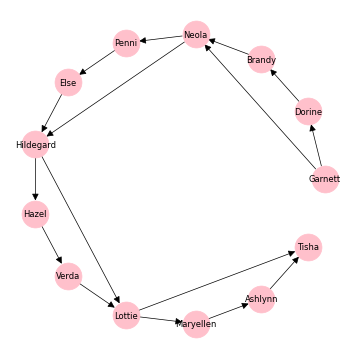


Causal context: A group of friends is planting a bed of flowers from seed, but the seed packets are not labeled. Garnett will be happy if the flowers she planted are pink. Dorine will be happy if the flowers she planted are yellow or if Garnett is happy. Brandy will be happy if the flowers she planted are pink or if Dorine is happy. Neola will be happy if the flowers she planted are yellow or if Garnett is happy or if Brandy is happy. Penni will be happy if the flowers she planted are yellow or if Neola is happy. Else will be happy if the flowers she planted are purple or if Penni is happy. Hildegard will be happy if the flowers she planted are purple or if Neola is happy or if Else is happy. Hazel will be happy if the flowers she planted are red or if Hildegard is happy. Verda will be happy if the flowers she planted are yellow or if Hazel is happy. Lottie will be happy if the flowers she planted are red or if Hildegard is happy or if Verda is happy. Maryellen will be happy if the fl

In [27]:
size = [4,4,4,4]
tg = FlowerGarden(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())

## Generate dataset

In [33]:
# x levels of graphical complexity (captured by BCC size).
# y tasks per graphical complexity level.
# z samples per task.
# = x*y*z subtasks.
graph_sizes = [[2,2],[3,3],[4,4]]
n_tasks_per_size = 3
n_samples_per_task = 1000

df = dg.get_dataset(task_generator = FlowerGarden,
                    graph_sizes = graph_sizes,
                    n_tasks_per_size = n_tasks_per_size,
                    n_samples_per_task = n_samples_per_task)

display(df)

,Task ID,Context ID,Sample ID,Nodes per BCC,DAG adjacency matrix,DAG nodes,CCT adjacency matrix,CCT nodes,Exogenous variables,Bernoulli parameters,Global quantity,Local quantities,Compositions,Causal context,Sample context,Factual queries,Counterfactual queries (cause = True),Counterfactual queries (cause = False)
0,0.0,0,0,"[2, 2]","[[0, 1, 0], [0, 0, 1], [0, 0, 0]]","[Crissie, Alannah, Nakita]","[[0.0, 1.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[Crissie, Alannah, Nakita]","[0M1D, 3G30, Q5A6]","[0.5, 0.5, 0.5]","(Crissie, Nakita)","[(Crissie, Alannah), (Alannah, Nakita)]","[[(Crissie, Alannah), (Alannah, Nakita)]]",A group of friends is planting a bed of flower...,"Once the flowers bloom, Crissie's flowers are...",{'Nakita': {'Prompt': 'Is Nakita happy? Begin ...,"{('Crissie', 'Nakita'): {'Prompt': 'Now, suppo...","{('Crissie', 'Nakita'): {'Prompt': 'Now, suppo..."
1,0.1,0,1,"[2, 2]","[[0, 1, 0], [0, 0, 1], [0, 0, 0]]","[Crissie, Alannah, Nakita]","[[0.0, 1.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[Crissie, Alannah, Nakita]","[0M1D, 3G30, Q5A6]","[0.5, 0.5, 0.5]","(Crissie, Nakita)","[(Crissie, Alannah), (Alannah, Nakita)]","[[(Crissie, Alannah), (Alannah, Nakita)]]",A group of friends is planting a bed of flower...,"Once the flowers bloom, Crissie's flowers are...",{'Nakita': {'Prompt': 'Is Nakita happy? Begin ...,"{('Crissie', 'Nakita'): {'Prompt': 'Now, suppo...","{('Crissie', 'Nakita'): {'Prompt': 'Now, suppo..."
2,0.2,0,2,"[2, 2]","[[0, 1, 0], [0, 0, 1], [0, 0, 0]]","[Crissie, Alannah, Nakita]","[[0.0, 1.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[Crissie, Alannah, Nakita]","[0M1D, 3G30, Q5A6]","[0.5, 0.5, 0.5]","(Crissie, Nakita)","[(Crissie, Alannah), (Alannah, Nakita)]","[[(Crissie, Alannah), (Alannah, Nakita)]]",A group of friends is planting a bed of flower...,"Once the flowers bloom, Crissie's flowers are...",{'Nakita': {'Prompt': 'Is Nakita happy? Begin ...,"{('Crissie', 'Nakita'): {'Prompt': 'Now, suppo...","{('Crissie', 'Nakita'): {'Prompt': 'Now, suppo..."
3,0.3,0,3,"[2, 2]","[[0, 1, 0], [0, 0, 1], [0, 0, 0]]","[Crissie, Alannah, Nakita]","[[0.0, 1.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[Crissie, Alannah, Nakita]","[0M1D, 3G30, Q5A6]","[0.5, 0.5, 0.5]","(Crissie, Nakita)","[(Crissie, Alannah), (Alannah, Nakita)]","[[(Crissie, Alannah), (Alannah, Nakita)]]",A group of friends is planting a bed of flower...,"Once the flowers bloom, Crissie's flowers are...",{'Nakita': {'Prompt': 'Is Nakita happy? Begin ...,"{('Crissie', 'Nakita'): {'Prompt': 'Now, suppo...","{('Crissie', 'Nakita'): {'Prompt': 'Now, suppo..."
4,0.4,0,4,"[2, 2]","[[0, 1, 0], [0, 0, 1], [0, 0, 0]]","[Crissie, Alannah, Nakita]","[[0.0, 1.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[Crissie, Alannah, Nakita]","[0M1D, 3G30, Q5A6]","[0.5, 0.5, 0.5]","(Crissie, Nakita)","[(Crissie, Alannah), (Alannah, Nakita)]","[[(Crissie, Alannah), (Alannah, Nakita)]]",A group of friends is planting a bed of flower...,"Once the flowers bloom, Crissie's flowers are...",{'Nakita': {'Prompt': 'Is Nakita happy? Begin ...,"{('Crissie', 'Nakita'): {'Prompt': 'Now, suppo...","{('Crissie', 'Nakita'): {'Prompt': 'Now, suppo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,8.995,8,995,"[4, 4]","[[0, 1, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...","[Beula, Kaylyn, Cruz, Simona, Roni, Orpha, Ver...","[[0.0, 1.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[Beula, Simona, Vernita]","[COAB, NR0K, OTZA, KI71, JF3J, 8TPM, VTSW]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]","(Beula, Vernita)","[(Beula, Simona), (Simona, Vernita)]","[[(Beula, Simona), (Simona, Vernita)]]",A group of friends is planting a bed of flower...,"Once the flowers bloom, Beula's flowers are s...",{'Vernita': {'Prompt': 'Is Vernita happy? Begi...,"{('Beula', 'Vernita'): {'Prompt': 'Now, suppos...","{('Beula', 'Vernita'): {'Prompt': 'Now, suppos..."
8996,8.996,8,996,"[4, 4]","[[0, 1, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],...","[Beula, Kaylyn, Cruz, Simona, Roni, Orpha, Ver...","[[0.0,

In [34]:
# Process prompts.
df_factual, df_cf = dg.process_prompts()
display(df_factual)
display(df_cf)

,Task ID,Context ID,Sample ID,Nodes per BCC,Effect,Prompt,True
0,0.0,0,0,"[2, 2]",Nakita,A group of friends is planting a bed of flower...,0
1,0.0,0,0,"[2, 2]",Alannah,A group of friends is planting a bed of flower...,0
2,0.1,0,1,"[2, 2]",Nakita,A group of friends is planting a bed of flower...,1
3,0.1,0,1,"[2, 2]",Alannah,A group of friends is planting a bed of flower...,1
4,0.2,0,2,"[2, 2]",Nakita,A group of friends is planting a bed of flower...,1
...,...,...,...,...,...,...,...
17995,8.997,8,997,"[4, 4]",Simona,A group of friends is planting a bed of flower...,1
17996,8.998,8,998,"[4, 4]",Vernita,A group of friends is planting a bed of flower...,1
17997,8.998,8,998,"[4, 4]",Simona,A group of friends is planting a bed of flower...,1
17998,8.999,8,999,"[4, 4]",Vernita,A group of friends is planting a bed of flower...,1


,Task ID,Context ID,Sample ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Prompt (cause = True),True (cause = True),Prompt (cause = False),True (cause = False)
0,0.0,0,0,"[2, 2]","(Crissie, Nakita)",Crissie,Nakita,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
1,0.0,0,0,"[2, 2]","(Crissie, Alannah)",Crissie,Alannah,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
2,0.0,0,0,"[2, 2]","(Alannah, Nakita)",Alannah,Nakita,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
3,0.1,0,1,"[2, 2]","(Crissie, Nakita)",Crissie,Nakita,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
4,0.1,0,1,"[2, 2]","(Crissie, Alannah)",Crissie,Alannah,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
...,...,...,...,...,...,...,...,...,...,...,...
26995,8.998,8,998,"[4, 4]","(Beula, Simona)",Beula,Simona,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,1
26996,8.998,8,998,"[4, 4]","(Simona, Vernita)",Simona,Vernita,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
26997,8.999,8,999,"[4, 4]","(Beula, Vernita)",Beula,Vernita,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,1
26998,8.999,8,999,"[4, 4]","(Beula, Simona)",Beula,Simona,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,1


In [35]:
pns_dict = dg.get_pns_dict(verbose = True)
pns_dict

-- PNS = 0.245 | ATE = 0.245 --
-- PNS = 0.477 | ATE = 0.477 --
-- PNS = 0.501 | ATE = 0.501 --
-- PNS = 0.247 | ATE = 0.247 --
-- PNS = 0.503 | ATE = 0.503 --
-- PNS = 0.483 | ATE = 0.483 --
-- PNS = 0.256 | ATE = 0.256 --
-- PNS = 0.533 | ATE = 0.5329999999999999 --
-- PNS = 0.49 | ATE = 0.49 --
-- PNS = 0.059 | ATE = 0.05900000000000005 --
-- PNS = 0.253 | ATE = 0.253 --
-- PNS = 0.232 | ATE = 0.23199999999999998 --
-- PNS = 0.078 | ATE = 0.07799999999999996 --
-- PNS = 0.3 | ATE = 0.30000000000000004 --
-- PNS = 0.266 | ATE = 0.266 --
-- PNS = 0.051 | ATE = 0.051000000000000045 --
-- PNS = 0.219 | ATE = 0.21899999999999997 --
-- PNS = 0.256 | ATE = 0.256 --
-- PNS = 0.017 | ATE = 0.017000000000000015 --
-- PNS = 0.123 | ATE = 0.123 --
-- PNS = 0.135 | ATE = 0.135 --
-- PNS = 0.017 | ATE = 0.017000000000000015 --
-- PNS = 0.136 | ATE = 0.136 --
-- PNS = 0.126 | ATE = 0.126 --
-- PNS = 0.011 | ATE = 0.01100000000000001 --
-- PNS = 0.122 | ATE = 0.122 --
-- PNS = 0.119 | ATE = 0.119 -

{0: {"('Crissie', 'Nakita')": 0.245,
  "('Crissie', 'Alannah')": 0.477,
  "('Alannah', 'Nakita')": 0.501,
  "[('Crissie', 'Alannah'), ('Alannah', 'Nakita')]": 0.238977},
 1: {"('Berniece', 'Dayana')": 0.247,
  "('Berniece', 'Delta')": 0.503,
  "('Delta', 'Dayana')": 0.483,
  "[('Berniece', 'Delta'), ('Delta', 'Dayana')]": 0.242949},
 2: {"('Carmela', 'Kylah')": 0.256,
  "('Carmela', 'Huldah')": 0.533,
  "('Huldah', 'Kylah')": 0.49,
  "[('Carmela', 'Huldah'), ('Huldah', 'Kylah')]": 0.26117},
 3: {"('Jennifer', 'Gabrielle')": 0.059,
  "('Jennifer', 'Tessa')": 0.253,
  "('Tessa', 'Gabrielle')": 0.232,
  "[('Jennifer', 'Tessa'), ('Tessa', 'Gabrielle')]": 0.058696000000000005},
 4: {"('Aleta', 'Micah')": 0.078,
  "('Aleta', 'Virgie')": 0.3,
  "('Virgie', 'Micah')": 0.266,
  "[('Aleta', 'Virgie'), ('Virgie', 'Micah')]": 0.0798},
 5: {"('Bettyjane', 'Katy')": 0.051,
  "('Bettyjane', 'Lurena')": 0.219,
  "('Lurena', 'Katy')": 0.256,
  "[('Bettyjane', 'Lurena'), ('Lurena', 'Katy')]": 0.056064},

In [36]:
threshold_dict = dg.get_internal_consistency_thresholds(multiplier = 1.25)
threshold_dict

{0: {"[('Crissie', 'Alannah'), ('Alannah', 'Nakita')]": 0.030729591836734696},
 1: {"[('Berniece', 'Delta'), ('Delta', 'Dayana')]": 0.02050101214574898},
 2: {"[('Carmela', 'Huldah'), ('Huldah', 'Kylah')]": 0.02524414062500004},
 3: {"[('Jennifer', 'Tessa'), ('Tessa', 'Gabrielle')]": 0.0064406779661015205},
 4: {"[('Aleta', 'Virgie'), ('Virgie', 'Micah')]": 0.028846153846153782},
 5: {"[('Bettyjane', 'Lurena'), ('Lurena', 'Katy')]": 0.1241176470588237},
 6: {"[('Kaliyah', 'Tarsha'), ('Tarsha', 'Camisha')]": 0.029044117647058783},
 7: {"[('Rayne', 'Dorene'), ('Dorene', 'Brittny')]": 0.01000000000000005},
 8: {"[('Beula', 'Simona'), ('Simona', 'Vernita')]": 0.3997727272727274}}

In [37]:
df_cf[df_cf["Context ID"] == 0]

,Task ID,Context ID,Sample ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Prompt (cause = True),True (cause = True),Prompt (cause = False),True (cause = False)
0,0.0,0,0,"[2, 2]","(Crissie, Nakita)",Crissie,Nakita,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
1,0.0,0,0,"[2, 2]","(Crissie, Alannah)",Crissie,Alannah,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
2,0.0,0,0,"[2, 2]","(Alannah, Nakita)",Alannah,Nakita,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
3,0.1,0,1,"[2, 2]","(Crissie, Nakita)",Crissie,Nakita,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
4,0.1,0,1,"[2, 2]","(Crissie, Alannah)",Crissie,Alannah,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.998,0,998,"[2, 2]","(Crissie, Alannah)",Crissie,Alannah,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,0
2996,0.998,0,998,"[2, 2]","(Alannah, Nakita)",Alannah,Nakita,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,1
2997,0.999,0,999,"[2, 2]","(Crissie, Nakita)",Crissie,Nakita,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,1
2998,0.999,0,999,"[2, 2]","(Crissie, Alannah)",Crissie,Alannah,A group of friends is planting a bed of flower...,1,A group of friends is planting a bed of flower...,1


## End of document